In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [6]:
# 1. Fetch historical data
crypto = 'BTC-USD'  # Bitcoin
data = yf.download(crypto, start='2020-01-01', end='2023-10-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
# 2. Calculate log returns
data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [10]:
# 3. Estimate the parameters
mu = data['Log Returns'].mean()  # Mean of returns
sigma = data['Log Returns'].std()  # Standard deviation of returns

In [12]:
# 4. Monte Carlo Simulation settings
S0 = data['Adj Close'][-1]  # Starting price (current price)
T = 365  # Number of days to simulate
simulations = 1000  # Number of simulations
dt = 1  # Time step (1 day)
np.random.seed(42)  # For reproducibility

C:\Users\mpjau\AppData\Local\Temp\ipykernel_17984\648021821.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S0 = data['Adj Close'][-1]  # Starting price (current price)


In [14]:
# 5. Run Monte Carlo Simulation
simulated_prices = np.zeros((T, simulations))
simulated_prices[0] = S0

In [16]:
for t in range(1, T):
    Z = np.random.standard_normal(simulations)  # Random numbers from standard normal
    simulated_prices[t] = simulated_prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

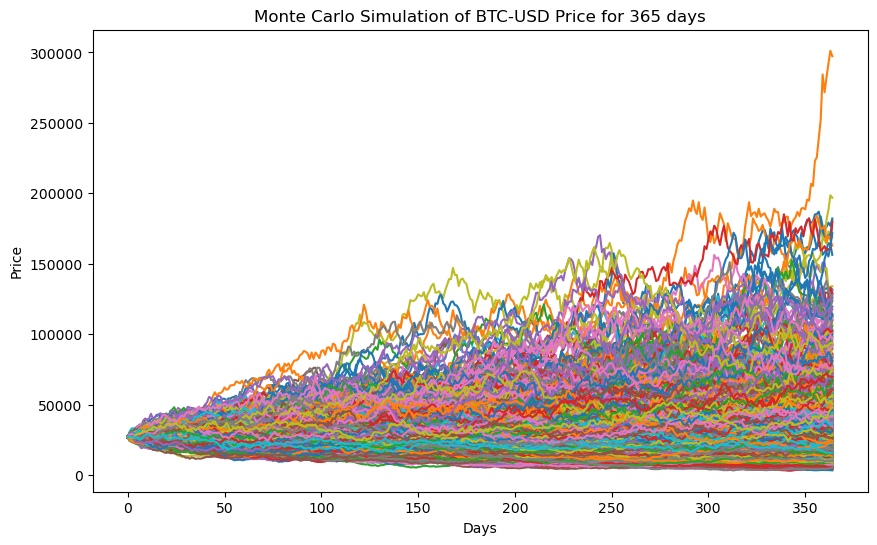

In [18]:
# 6. Plot the simulation results
plt.figure(figsize=(10,6))
plt.plot(simulated_prices)
plt.title(f"Monte Carlo Simulation of {crypto} Price for {T} days")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [20]:
# 7. Analyze the results (e.g., mean, quantiles)
final_prices = simulated_prices[-1]
mean_price = np.mean(final_prices)
quantiles = np.percentile(final_prices, [5, 50, 95])

In [22]:
print(f"Mean simulated price after {T} days: {mean_price}")
print(f"5th percentile: {quantiles[0]}, Median: {quantiles[1]}, 95th percentile: {quantiles[2]}")

Mean simulated price after 365 days: 38061.96706272608
5th percentile: 9455.422325164405, Median: 30405.889178621837, 95th percentile: 93326.2269376131


In [24]:
print(S0)

26967.916015625
